## package installation 

In [1]:
import pickle
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.signal import detrend 
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
from matplotlib.colors import LinearSegmentedColormap

In [50]:
import statsmodels.formula.api as smf

In [4]:
warnings.filterwarnings("ignore")

In [5]:
%store -r private_donors_income_reshape

In [6]:
private_donors_income_reshape.head()

,OrgCode,CountryStandardised,CountrySubmitted,RegionSubmitted,LineDescription,IncomeAllocation,RestrictedIncome,EmergencyIncome,Source,Category,...,Region,Group,Status,Donor Type,Date,Income,Donors,Hierarchy,Log Income,LogIncome
0,ACT,Australia,Australia,Oceania,Ind. Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,Asia & Pacific,Private Sector,Newly Acquired,One-off Giving,2010,0.0,0.0,Cash_Individual Giving_Single Giving,-inf,-inf
1,ACT,Mozambique,Mozambique,Africa,Philanthropy & Partnerships,Country - raising income,Unspecified,Unspecified,Cash,Corporations,...,Africa,Private Sector,NaN,NaN,2010,0.0,0.0,Cash_Corporations_Unspecified,-inf,-inf
2,ACT,Somalia,Somaliland,Africa,Philanthropy & Partnerships,Country - raising income,Unspecified,Unspecified,Cash,Foundations,...,Africa,Private Sector,NaN,NaN,2010,0.0,0.0,Cash_Foundations_Unspecified,-inf,-inf
3,ACT,Spain,Alianza (Spain),Europe,Regular Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,Europe,Private Sector,Total,Committed Giving,2010,0.0,0.0,Cash_Individual Giving_Regular Giving,-inf,-inf
4,ACT,Spain,Alianza (Spain),Europe,Regular Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,Europe,Private Sector,Newly Acquired,Committed Giving,2010,0.0,0.0,Cash_Individual Giving_Regular Giving,-inf,-inf


In [7]:
%store -r private_donors_income_no_outliers

In [8]:
private_donors_income_no_outliers.head()

,OrgCode,CountryStandardised,CountrySubmitted,RegionSubmitted,LineDescription,IncomeAllocation,RestrictedIncome,EmergencyIncome,Source,Category,...,Region,Group,Status,Donor Type,Date,Income,Donors,Hierarchy,Log Income,LogIncome
0,ACT,Australia,Australia,Oceania,Ind. Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,Asia & Pacific,Private Sector,Newly Acquired,One-off Giving,2010,0.0,0.0,Cash_Individual Giving_Single Giving,-inf,-inf
1,ACT,Mozambique,Mozambique,Africa,Philanthropy & Partnerships,Country - raising income,Unspecified,Unspecified,Cash,Corporations,...,Africa,Private Sector,NaN,NaN,2010,0.0,0.0,Cash_Corporations_Unspecified,-inf,-inf
2,ACT,Somalia,Somaliland,Africa,Philanthropy & Partnerships,Country - raising income,Unspecified,Unspecified,Cash,Foundations,...,Africa,Private Sector,NaN,NaN,2010,0.0,0.0,Cash_Foundations_Unspecified,-inf,-inf
3,ACT,Spain,Alianza (Spain),Europe,Regular Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,Europe,Private Sector,Total,Committed Giving,2010,0.0,0.0,Cash_Individual Giving_Regular Giving,-inf,-inf
4,ACT,Spain,Alianza (Spain),Europe,Regular Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,Europe,Private Sector,Newly Acquired,Committed Giving,2010,0.0,0.0,Cash_Individual Giving_Regular Giving,-inf,-inf


In [10]:
#drop the columns of hierarchy,log income,log income,donors 
private_donors_income_no_outliers.drop(columns = ['Donors','Log Income','LogIncome','Donor Type'] , inplace = True)

KeyError: "['Donors', 'Log Income', 'LogIncome', 'Donor Type'] not found in axis"

In [11]:
private_donors_income_no_outliers.drop(columns = ['Status'] , inplace = True)

In [12]:
private_donors_income_no_outliers.head()

,OrgCode,CountryStandardised,CountrySubmitted,RegionSubmitted,LineDescription,IncomeAllocation,RestrictedIncome,EmergencyIncome,Source,Category,...,UNHCR market type,UNHCR market,Panel Org,UNHCR region,Country,Region,Group,Date,Income,Hierarchy
0,ACT,Australia,Australia,Oceania,Ind. Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,NAP,1,0,APAC,Australia,Asia & Pacific,Private Sector,2010,0.0,Cash_Individual Giving_Single Giving
1,ACT,Mozambique,Mozambique,Africa,Philanthropy & Partnerships,Country - raising income,Unspecified,Unspecified,Cash,Corporations,...,NaN,0,0,AFR,Mozambique,Africa,Private Sector,2010,0.0,Cash_Corporations_Unspecified
2,ACT,Somalia,Somaliland,Africa,Philanthropy & Partnerships,Country - raising income,Unspecified,Unspecified,Cash,Foundations,...,NaN,0,0,AFR,Somalia,Africa,Private Sector,2010,0.0,Cash_Foundations_Unspecified
3,ACT,Spain,Alianza (Spain),Europe,Regular Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,NAP,1,0,EUR,Spain,Europe,Private Sector,2010,0.0,Cash_Individual Giving_Regular Giving
4,ACT,Spain,Alianza (Spain),Europe,Regular Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,NAP,1,0,EUR,Spain,Europe,Private Sector,2010,0.0,Cash_Individual Giving_Regular Giving


## Data Summary Statistics

In [27]:
private_donors_income_no_outliers['Date'].dtype

dtype('int64')

In [ ]:
#convert date to datetime 
private_donors_income_no_outliers['Date'].to_datetime()

In [28]:
private_donors_income_no_outliers.describe()['Income']

count    385759.000000
mean          1.075692
std           5.375343
min         -27.030000
25%           0.000000
50%           0.000000
75%           0.000000
max          47.220000
Name: Income, dtype: float64

In [34]:
private_donors_income_no_outliers['Income'].isna().sum()

0

In [35]:
private_income_reshape['Income'].isna().sum()

183611

In [29]:
private_donors_income_reshape.describe()['Income']

count    5.019040e+05
mean     4.514529e+05
std      9.941224e+06
min     -4.752800e+07
25%      0.000000e+00
50%      0.000000e+00
75%      1.889000e+01
max      2.286355e+09
Name: Income, dtype: float64

In [36]:
def outlier_detect(dataframe,column): 
    #finding the IQR 
    percentile25 = dataframe[column].quantile(0.25)
    percentile75 = dataframe[column].quantile(0.75)
    iqr = percentile75 - percentile25
    #setting the upper limit and the lower limit 
    upper_limit = percentile75 + 1.5 * iqr 
    lower_limit = percentile25 - 1.5 * iqr 
    #finding outliers and return output 
    return lower_limit,upper_limit

In [37]:
#datafrome : without outlier and not imputing missing values 
lower_limit,upper_limit = outlier_detect(private_donors_income_reshape,'Income')

In [39]:
private_income_no_outliers_ver2 = private_donors_income_reshape[(private_donors_income_reshape['Income'] >= lower_limit) & (private_donors_income_reshape['Income'] <= upper_limit)]

In [40]:
private_income_no_outliers_ver2['Income'].isna().sum()

0

In [ ]:
private_donors_income_no_outliers.describe()['Income']

In [26]:
private_donors_income_no_outliers.head()

,OrgCode,CountryStandardised,CountrySubmitted,RegionSubmitted,LineDescription,IncomeAllocation,RestrictedIncome,EmergencyIncome,Source,Category,...,UNHCR market type,UNHCR market,Panel Org,UNHCR region,Country,Region,Group,Date,Income,Hierarchy
0,ACT,Australia,Australia,Oceania,Ind. Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,NAP,1,0,APAC,Australia,Asia & Pacific,Private Sector,2010,0.0,Cash_Individual Giving_Single Giving
1,ACT,Mozambique,Mozambique,Africa,Philanthropy & Partnerships,Country - raising income,Unspecified,Unspecified,Cash,Corporations,...,NaN,0,0,AFR,Mozambique,Africa,Private Sector,2010,0.0,Cash_Corporations_Unspecified
2,ACT,Somalia,Somaliland,Africa,Philanthropy & Partnerships,Country - raising income,Unspecified,Unspecified,Cash,Foundations,...,NaN,0,0,AFR,Somalia,Africa,Private Sector,2010,0.0,Cash_Foundations_Unspecified
3,ACT,Spain,Alianza (Spain),Europe,Regular Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,NAP,1,0,EUR,Spain,Europe,Private Sector,2010,0.0,Cash_Individual Giving_Regular Giving
4,ACT,Spain,Alianza (Spain),Europe,Regular Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,NAP,1,0,EUR,Spain,Europe,Private Sector,2010,0.0,Cash_Individual Giving_Regular Giving


In [16]:
private_donors_income_no_outliers.to_excel('private_donors_income_no_outliers.xlsx')

## datasets loading

In [13]:
#open the clean version of the private income dataset 
%store -r private_income_new

In [14]:
%store

Stored variables and their in-db values:
private_donors_income_no_outliers             ->        OrgCode CountryStandardised CountrySubmitte
private_donors_income_reshape                 ->        OrgCode CountryStandardised CountrySubmitte
private_donors_new                            ->      OrgCode               CountryStandardised  \

private_donors_reshape                        ->       OrgCode               CountryStandardised  \
private_income                                ->       OrgCode CountryStandardised   CountrySubmitt
private_income_new                            ->       OrgCode CountryStandardised   CountrySubmitt
private_income_reshape                        ->        OrgCode CountryStandardised   CountrySubmit


In [15]:
%store -r private_income_reshape

In [16]:
%store -r private_donors_income_no_outliers

In [17]:
%store -r private_donors_new

In [18]:
#read the pickle file containing the donors dataset 
with open("private_donors.pkl", "rb") as pklfile:
    private_donors = pickle.load(pklfile)

## palette

In [19]:
UNHCR_palette = ["#151819","#565656","#cdcdcd","#dad9d9","#20345b","#536280","#006ab4","#0090bc","#3b8cc5","#699cd4","#8bb2dd","#dfe6f6","#fcc00d","#e4cc00",'#ffed00',"#c01718","#e73d59","#ec697f"]
custom_palette = LinearSegmentedColormap.from_list('UNHCR_palette', UNHCR_palette)

## functions

In [20]:
def ts_data_currency(data,currency):  
    '''
    This function allows to filter  out the data according to a selected currency 
    We first filter out the dataframe according to the column cuurrency code 
    We make sure that only the columns related to the Local Currency are returned
    '''
    #filter out only the data for the selected currency 
    data_new = data[data['CurrencyCode'] == currency] 
    data_new = data_new[[ 
       'IncomeLCU2010', 'IncomeLCU2011','IncomeLCU2012', 
       'IncomeLCU2013', 'IncomeLCU2014', 'IncomeLCU2015',
       'IncomeLCU2016', 'IncomeLCU2017', 'IncomeLCU2018', 
       'IncomeLCU2019','IncomeLCU2020', 'IncomeLCU2021', 
       'IncomeLCU2022' 
]]
    return data_new 

In [21]:
# we want to implement a function where we can filter out income acccording to specific criterias in the dataset 
#the only columns returned are those of USD dollars 

def filtering_income(dataframe,filters):
    """
    Filter private_public_income based on a dictionary of column-value pairs.

    Parameters:
    - data_frame: Pandas DataFrame to be filtered.
    - filters: Dictionary of column-value pairs for filtering.

    Returns:
    - Filtered DataFrame.
    """
    filtered_income = dataframe.copy()

    for column, value in filters.items():
        filtered_income = filtered_income[filtered_income[column] == value]
    return filtered_income[[
       
       'IncomeUSD2010', 'IncomeUSD2011','IncomeUSD2012',
       'IncomeUSD2013', 'IncomeUSD2014', 'IncomeUSD2015', 'IncomeUSD2016',
       'IncomeUSD2017', 'IncomeUSD2018', 'IncomeUSD2019', 'IncomeUSD2020',
       'IncomeUSD2021', 'IncomeUSD2022' 
]]


In [22]:
#example to the execution of the function 
# I want to filter out the the original dataframe to include UNHCR data with an income source cash 
filters_to_apply = {'OrgCode':'UHR','Source':'Cash'} 
#apply the filtering_income function
filtered_cash_UNHCR = filtering_income(private_income_new,filters_to_apply)

In [23]:
#time series decomposition function 
def time_series_plot(df,title): 
    plt.figure(figsize = (12, 6))
    sns.pointplot(x = df['Date'].dt.year, y = df['Income'], label = 'Value',estimator = 'sum')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Time Series Plot Of '  + ' '+ title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=90)
    return plt 

# I . Data Preprocessing 

### 1. Preparing Data 
We will merge the income and donor data to enable a comprehensive panel analysis

In [24]:
numeric_cols_donors = ['DonorsSubmitted2010', 'DonorsSubmitted2011', 'DonorsSubmitted2012',
       'DonorsSubmitted2013', 'DonorsSubmitted2014', 'DonorsSubmitted2015',
       'DonorsSubmitted2016', 'DonorsSubmitted2017', 'DonorsSubmitted2018',
       'DonorsSubmitted2019', 'DonorsSubmitted2020', 'DonorsSubmitted2021',
       'DonorsSubmitted2022']

In [18]:
id_vars_2 = [col for col in private_donors_new.columns if col not in numeric_cols_donors]

In [19]:
# we will reshape the donor data
private_donors_reshape = pd.melt(private_donors_new,id_vars = id_vars_2 , value_vars = numeric_cols_donors,var_name = 'Date',value_name = 'Donors' ) 
#reformat the date column 
private_donors_reshape['Date'] = private_donors_reshape['Date'].str.extract(r'(\d+)') 

In [20]:
common_columns = set(private_income_reshape.columns).intersection(private_donors_reshape.columns)

In [21]:
#merge the two datasets : donors and income
private_donors_income_reshape = private_income_reshape.merge(private_donors_reshape,how = 'outer', on = list(common_columns) )

In [22]:
#reorder the dataset
desired_order = ['OrgCode', 'CountryStandardised', 'CountrySubmitted', 'RegionSubmitted',
       'LineDescription', 'IncomeAllocation', 'RestrictedIncome',
       'EmergencyIncome', 'Source', 'Category', 'Type', 'Item', 'CurrencyCode',
       'Notes', 'ProvisionalFigureCY', 'UNHCR market type', 'UNHCR market',
       'Panel Org', 'UNHCR region', 'Country', 'Region', 'Group','Status', 'Donor Type', 'Date', 'Income','Donors']
private_donors_income_reshape = private_donors_income_reshape[desired_order]

In [23]:
#convert donors data into int or float 
private_donors_income_reshape['Donors'] = private_donors_income_reshape['Donors'].astype('float')

In [24]:
#create a seperate dataframe for cash and in-kind 
private_donors_income_cash = private_donors_income_reshape[private_donors_income_reshape['Group'] == 'Cash' ]
private_donors_income_inkind = private_donors_income_reshape[private_donors_income_reshape['Group'] ==  'In-Kind']

In [25]:
#slice the dataset where we don't have outliers
private_donors_income_cash_no_outliers = private_donors_income_no_outliers[private_donors_income_no_outliers['Source'] == 'Cash' ]
private_donors_income_inkind_no_outliers = private_donors_income_no_outliers[private_donors_income_no_outliers['Source'] ==  'In-Kind']

# II . Time Series Analysis 

In [26]:
numeric_cols_income = ['IncomeUSD2010',
 'IncomeUSD2011',
 'IncomeUSD2012',
 'IncomeUSD2013',
 'IncomeUSD2014',
 'IncomeUSD2015',
 'IncomeUSD2016',
 'IncomeUSD2017',
 'IncomeUSD2018',
 'IncomeUSD2019',
 'IncomeUSD2020',
 'IncomeUSD2021',
 'IncomeUSD2022']

In [27]:
id_vars_1 = [col for col in private_income_new.columns if col not in numeric_cols_income]

In [28]:
# we will reshape the income data
private_income_reshape = pd.melt(private_income_new,id_vars = id_vars_1 , value_vars = numeric_cols_income,var_name = 'Date', value_name = 'Income') 
#reformat the date column 
private_income_reshape['Date'] = private_income_reshape['Date'].str.extract(r'(\d+)') 
private_income_reshape.head()

,OrgCode,CountryStandardised,CountrySubmitted,RegionSubmitted,LineDescription,IncomeAllocation,RestrictedIncome,EmergencyIncome,Source,Category,...,ProvisionalFigureCY,UNHCR market type,UNHCR market,Panel Org,UNHCR region,Country,Region,Group,Date,Income
0,ACT,Australia,Australia,Oceania,Ind. Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,NaN,NAP,1,0,APAC,Australia,Asia & Pacific,Private Sector,2010,NaN
1,ACT,Mozambique,Mozambique,Africa,Philanthropy & Partnerships,Country - raising income,Unspecified,Unspecified,Cash,Corporations,...,NaN,NaN,0,0,AFR,Mozambique,Africa,Private Sector,2010,NaN
2,ACT,Somalia,Somaliland,Africa,Philanthropy & Partnerships,Country - raising income,Unspecified,Unspecified,Cash,Foundations,...,NaN,NaN,0,0,AFR,Somalia,Africa,Private Sector,2010,NaN
3,ACT,Spain,Alianza (Spain),Europe,Regular Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,NaN,NAP,1,0,EUR,Spain,Europe,Private Sector,2010,NaN
4,GRP,Australia,Australia Pacific,Oceania,Regular,Country - raising income,Unspecified,No,Cash,Individual Giving,...,NaN,NAP,1,0,APAC,Australia,Asia & Pacific,Private Sector,2010,NaN


## 1. Time Series Decomposition

In [29]:
# Apply the HP filter
private_income_reshape['cycle'], private_income_reshape['trend'] = sm.tsa.filters.hpfilter(private_income_reshape['Income'], lamb=6.25)

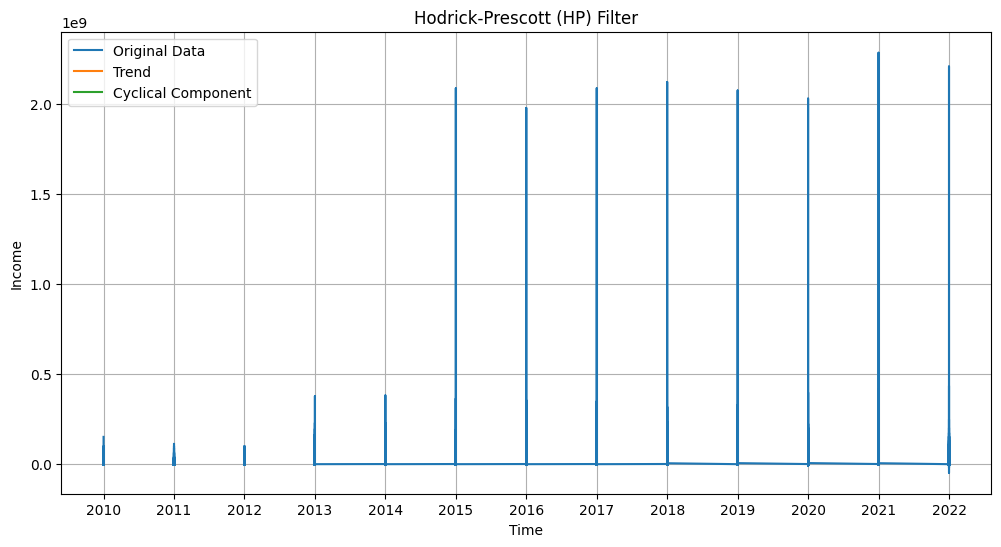

In [30]:
# Plot the original data, trend, and cyclical components
plt.figure(figsize=(12, 6))

plt.plot(private_income_reshape['Date'], private_income_reshape['Income'], label='Original Data')
plt.plot(private_income_reshape['Date'], private_income_reshape['trend'], label='Trend')
plt.plot(private_income_reshape['Date'], private_income_reshape['cycle'], label='Cyclical Component')

plt.xlabel('Time')
plt.ylabel('Income')
plt.title('Hodrick-Prescott (HP) Filter')
plt.legend()
plt.grid(True)
plt.show() 

## 2. Simple Linear Regression

### 2.1 General Income Linear Regression

### 2.1.1 General Income by year 

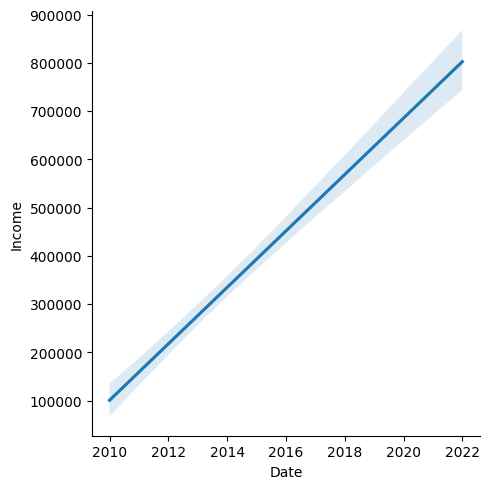

In [124]:
sns.lmplot(x = "Date", y = "Income", data = private_donors_income_reshape,scatter = False)

In [130]:
#general linear model 
# Fit linear regression model
model = sm.OLS.from_formula("Income ~ Date ", data=private_donors_income_reshape).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           7.80e-55
Time:                        11:42:42   Log-Likelihood:            -8.7988e+06
No. Observations:              501904   AIC:                         1.760e+07
Df Residuals:                  501902   BIC:                         1.760e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.174e+08   7.56e+06    -15.538      0.000   -1.32e+08   -1.03e+08
Date        5.848e+04   3749.391     15.597      0.000    5.11e+04    6.58e+04
==============================================================================
Omnibus:                  2295458.901   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   22653123845595.840
Skew:                         158.794   Prob(JB):                         0.00
Kurtosis:                   32913.852   Cond. No.                     1.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.1.1 General Income by Donors

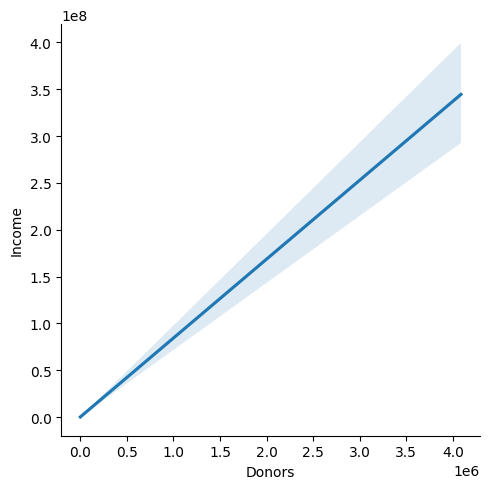

In [62]:
sns.lmplot(x = "Donors", y = "Income", data = private_donors_income_reshape,scatter = False)

In [64]:
#general linear model 
# Fit linear regression model
model = sm.OLS.from_formula("Income ~ Donors ", data=private_donors_income_reshape).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 5.187e+04
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:46:33   Log-Likelihood:            -1.4176e+06
No. Observations:               84489   AIC:                         2.835e+06
Df Residuals:                   84487   BIC:                         2.835e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.643e+05   1.62e+04     10.114      0.000    1.32e+05    1.96e+05
Donors        84.2215      0.370    227.740      0.000      83.497      84.946
==============================================================================
Omnibus:                   161543.595   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        951787094.447
Skew:                          14.455   Prob(JB):                         0.00
Kurtosis:                     522.162   Cond. No.                     4.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.2 Income Without Outliers Linear Regression

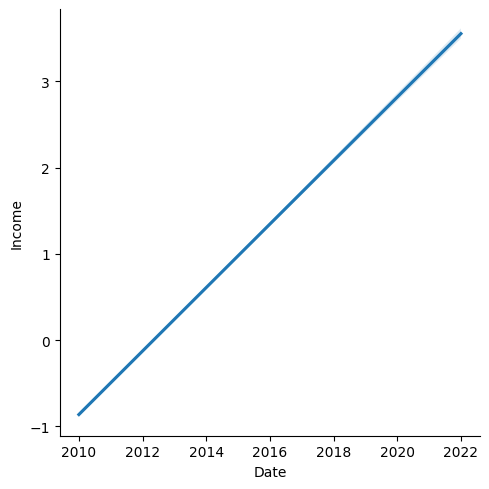

In [126]:
sns.lmplot(x = "Date", y = "Income", data = private_donors_income_no_outliers,scatter = False)

In [131]:
model = sm.OLS.from_formula("Income ~ Date ", data=private_donors_income_no_outliers).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                 2.450e+04
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:47:30   Log-Likelihood:            -1.1843e+06
No. Observations:              385759   AIC:                         2.369e+06
Df Residuals:                  385757   BIC:                         2.369e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -740.5398      4.738   -156.306      0.000    -749.826    -731.254
Date           0.3680      0.002    156.533      0.000       0.363       0.373
==============================================================================
Omnibus:                   398704.646   Durbin-Watson:                   1.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18798817.119
Skew:                           5.393   Prob(JB):                         0.00
Kurtosis:                      35.453   Cond. No.                     1.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

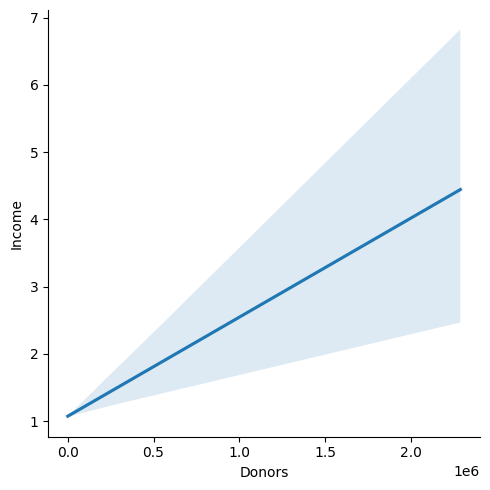

In [69]:
sns.lmplot(x = "Donors", y = "Income", data = private_donors_income_no_outliers,scatter = False)

In [70]:
model = sm.OLS.from_formula("Income ~ Donors ", data=private_donors_income_no_outliers).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.613
Date:                Sat, 23 Mar 2024   Prob (F-statistic):            0.00334
Time:                        13:13:23   Log-Likelihood:            -1.1961e+06
No. Observations:              385759   AIC:                         2.392e+06
Df Residuals:                  385757   BIC:                         2.392e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0734      0.009    123.504      0.000       1.056       1.090
Donors      1.472e-06   5.02e-07      2.935      0.003    4.89e-07    2.46e-06
==============================================================================
Omnibus:                   415454.393   Durbin-Watson:                   1.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21429853.633
Skew:                           5.753   Prob(JB):                         0.00
Kurtosis:                      37.654   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.2 Income Structure Through Time Analysis

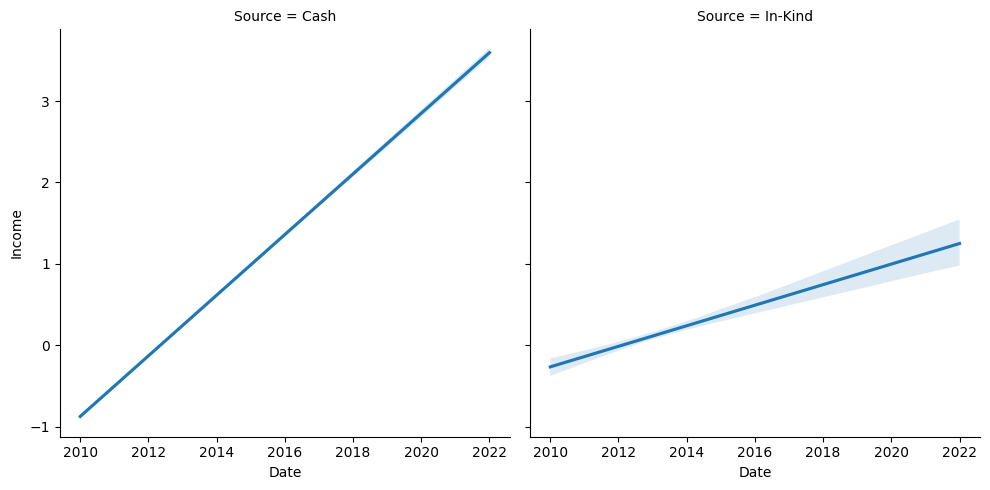

In [76]:
sns.lmplot(x = "Date", y = "Income", data = private_donors_income_no_outliers,col = 'Source',scatter = False)

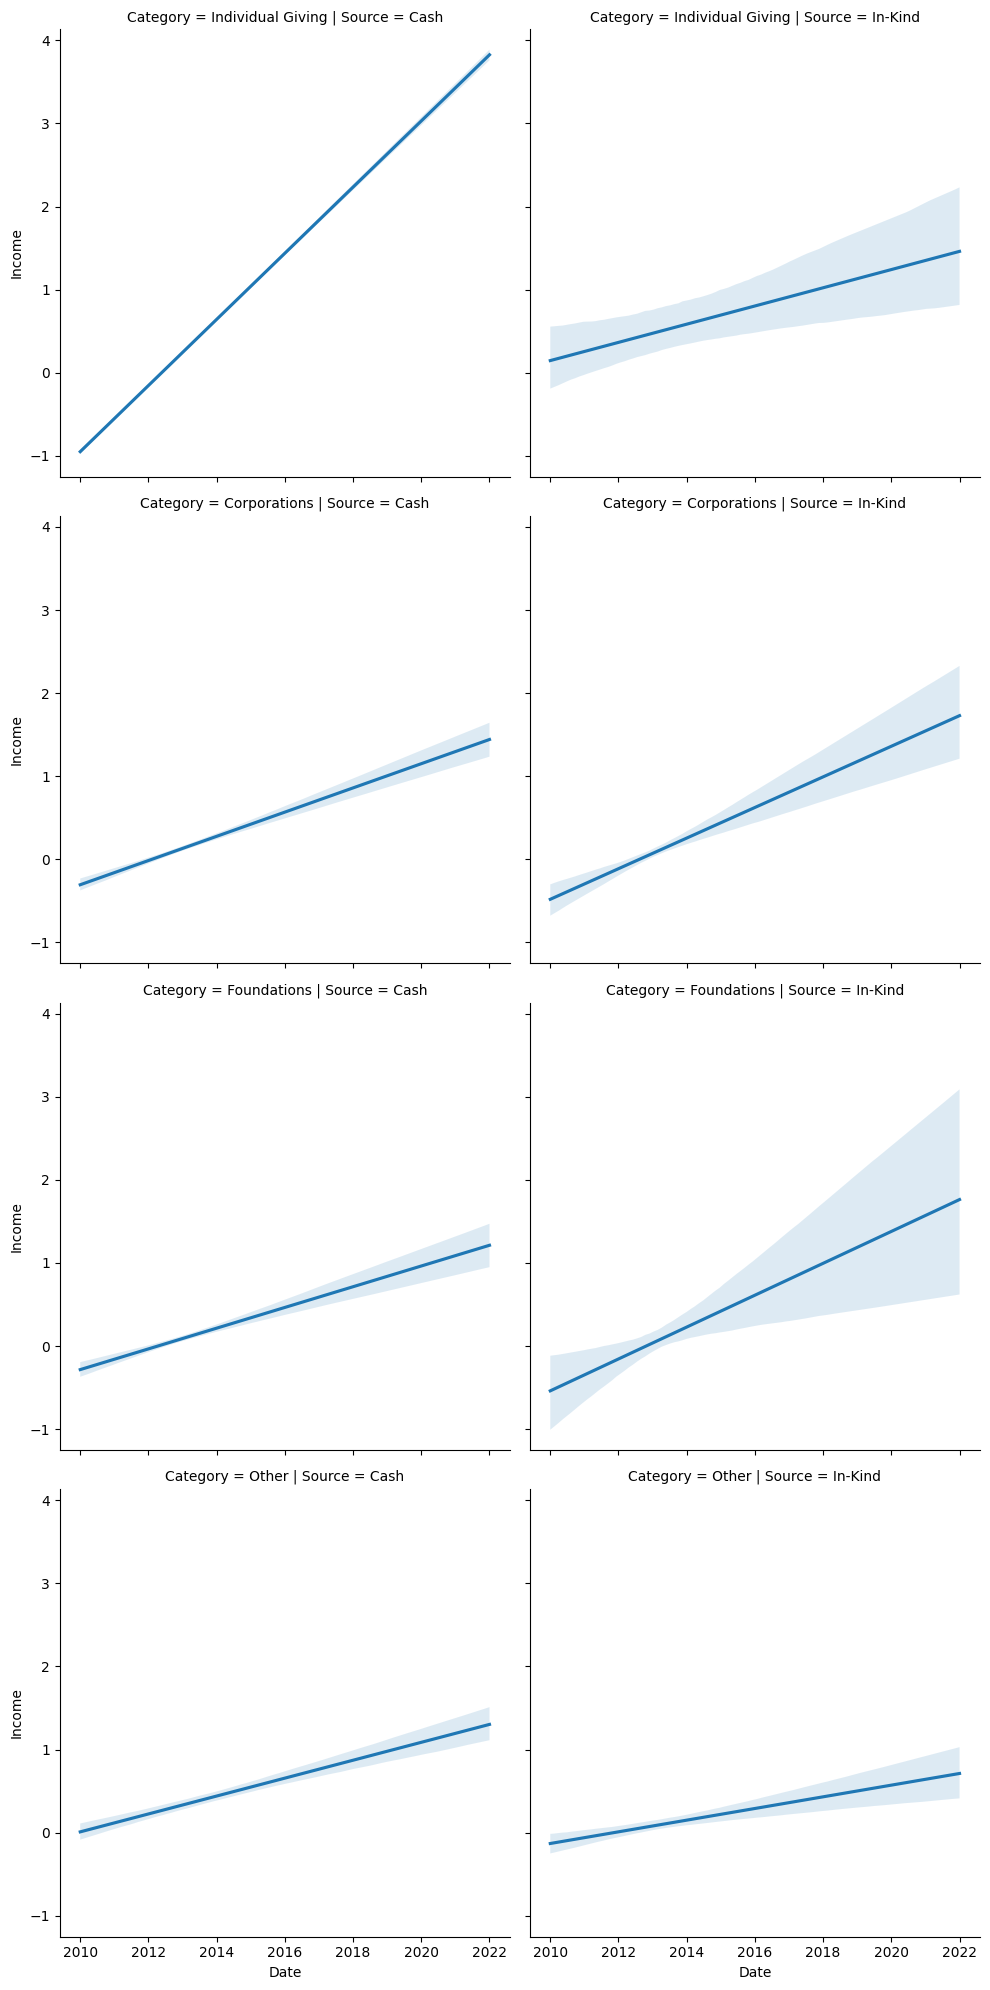

In [75]:
sns.lmplot(x = "Date", y = "Income", data = private_donors_income_no_outliers,col = 'Source',row = 'Category',scatter = False)

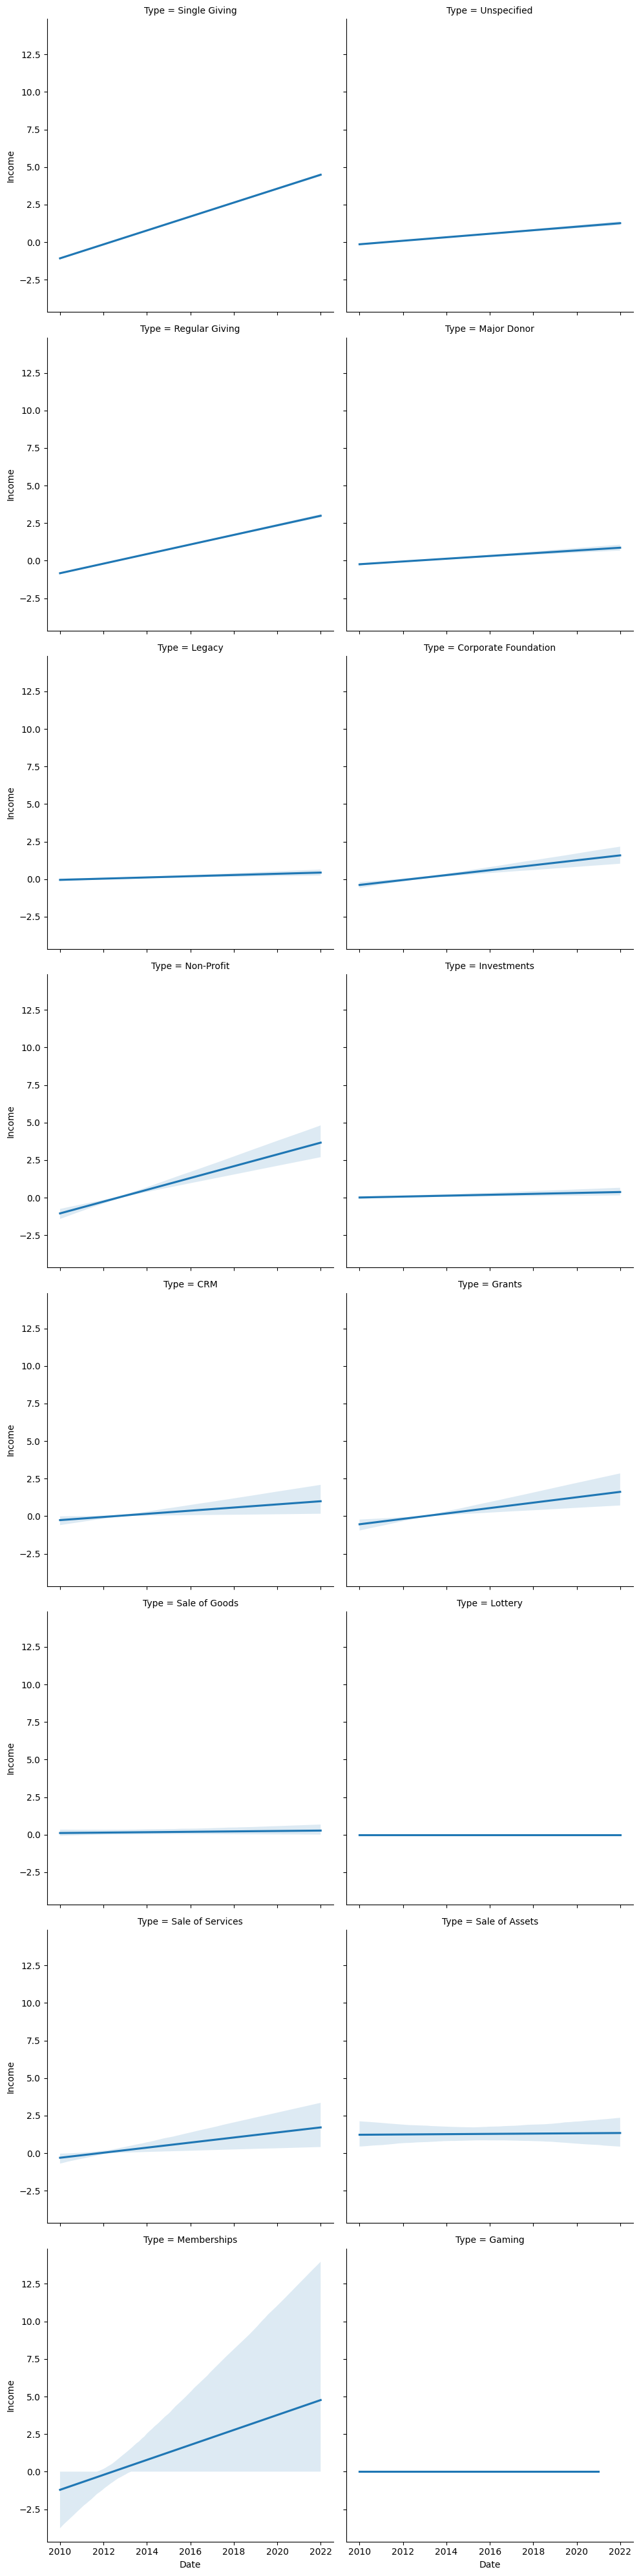

In [94]:
sns.lmplot(x = "Date", y = "Income", data = private_donors_income_cash_no_outliers,col = 'Type',scatter = False,col_wrap = 2)

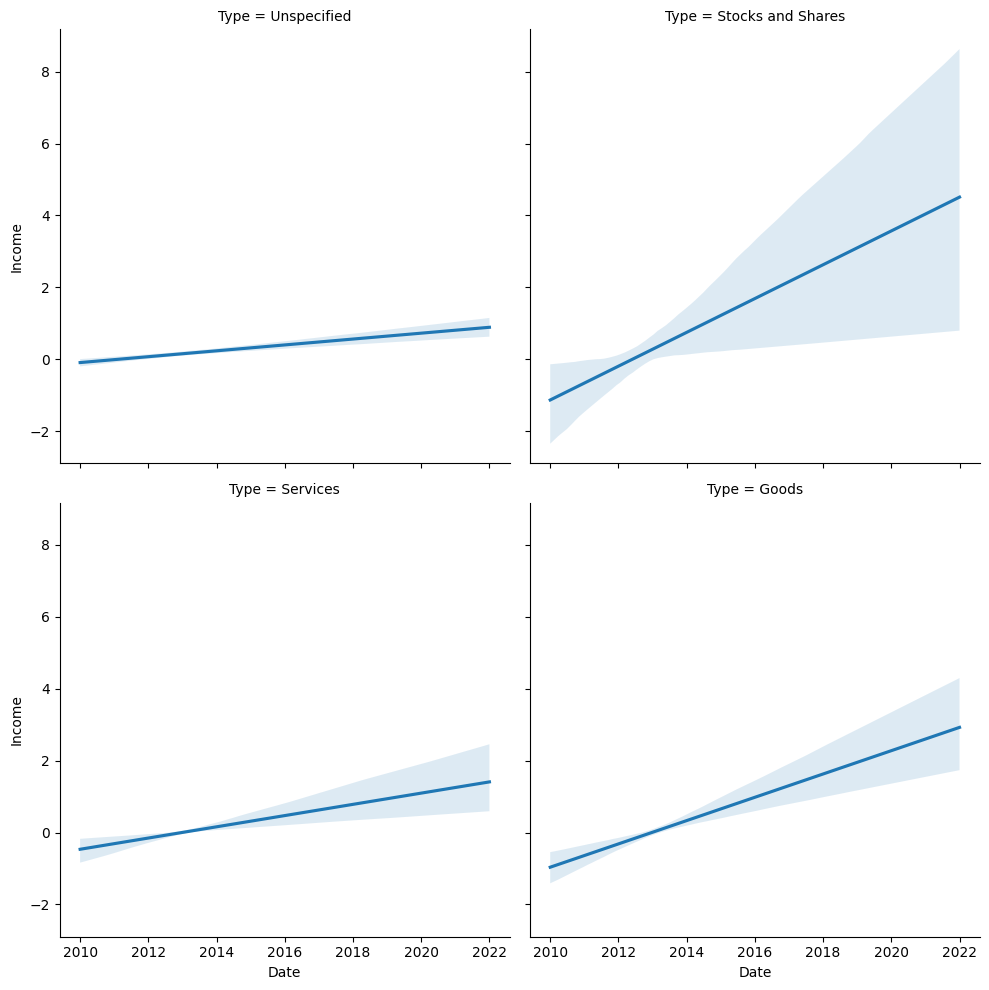

In [95]:
sns.lmplot(x = "Date", y = "Income", data = private_donors_income_inkind_no_outliers,col = 'Type',scatter = False,col_wrap = 2)

In [43]:
private_donors_income_reshape[private_donors_income_reshape['Type'] == 'Stocks and Shares']

,OrgCode,CountryStandardised,CountrySubmitted,RegionSubmitted,LineDescription,IncomeAllocation,RestrictedIncome,EmergencyIncome,Source,Category,...,Country,Region,Group,Status,Donor Type,Date,Income,Donors,Hierarchy_Type,Hierarchy_Category
2992,IRC,USA,USA,North America,NaN,Country - raising income,No,No,In-Kind,Corporations,...,USA,North America,Private Sector,NaN,NaN,2010,NaN,NaN,In-Kind_Corporations_Stocks and Shares,In-Kind_Corporations
3386,IRC,USA,USA,North America,NaN,Country - raising income,No,No,In-Kind,Foundations,...,USA,North America,Private Sector,NaN,NaN,2010,NaN,NaN,In-Kind_Foundations_Stocks and Shares,In-Kind_Foundations
3387,IRC,USA,USA,North America,NaN,Country - raising income,Yes,Yes,In-Kind,Foundations,...,USA,North America,Private Sector,NaN,NaN,2010,NaN,NaN,In-Kind_Foundations_Stocks and Shares,In-Kind_Foundations
3388,IRC,USA,USA,North America,NaN,Country - raising income,Yes,No,In-Kind,Foundations,...,USA,North America,Private Sector,NaN,NaN,2010,NaN,NaN,In-Kind_Foundations_Stocks and Shares,In-Kind_Foundations
3389,IRC,USA,USA,North America,NaN,Country - raising income,No,Yes,In-Kind,Foundations,...,USA,North America,Private Sector,NaN,NaN,2010,NaN,NaN,In-Kind_Foundations_Stocks and Shares,In-Kind_Foundations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446165,IRC,USA,Sweden,North America,NaN,Country - raising income,No,No,In-Kind,Individual Giving,...,USA,North America,Private Sector,NaN,NaN,2022,0.00,NaN,In-Kind_Individual Giving_Stocks and Shares,In-Kind_Individual Giving
446166,IRC,USA,Switzerland,North America,NaN,Country - raising income,No,No,In-Kind,Individual Giving,...,USA,North America,Private Sector,NaN,NaN,2022,119.00,NaN,In-Kind_Individual Giving_Stocks and Shares,In-Kind_Individual Giving
447205,IRC,USA,Japan,North America,NaN,Country - raising income,No,No,In-Kind,Individual Giving,...,USA,North America,Private Sector,NaN,NaN,2022,127.56,NaN,In-Kind_Individual Giving_Stocks and Shares,In-Kind_Individual Giving
447613,IRC,USA,Canada,North America,NaN,Country - raising income,No,No,In-Kind,Individual Giving,...,USA,North America,Private Sector,NaN,NaN,2022,24.07,NaN,In-Kind_Individual Giving_Stocks and Shares,In-Kind_Individual Giving


In [42]:
private_donors_income_cash_no_outliers[private_donors_income_cash_no_outliers['Type'] == 'Stocks and Shares']

,OrgCode,CountryStandardised,CountrySubmitted,RegionSubmitted,LineDescription,IncomeAllocation,RestrictedIncome,EmergencyIncome,Source,Category,...,Region,Group,Status,Donor Type,Date,Income,Donors,Hierarchy,Log Income,LogIncome


In [38]:
#we want to plot the evolution of stock and share in relation to their category
#filter out the dataset to include only where type = stocks and shares 
new_data = private_donors_income_cash_no_outliers[private_donors_income_cash_no_outliers['Type'] == 'Stocks and Shares'] 

sns.lmplot(x = "Date", y = "Income", data = new_data,col = 'Type',scatter = False,col_wrap = 2)


ValueError: Number of rows must be a positive integer, not 0

<Figure size 1000x0 with 0 Axes>

### 2.3 The Time Series Analysis of Income Analysis by Organization

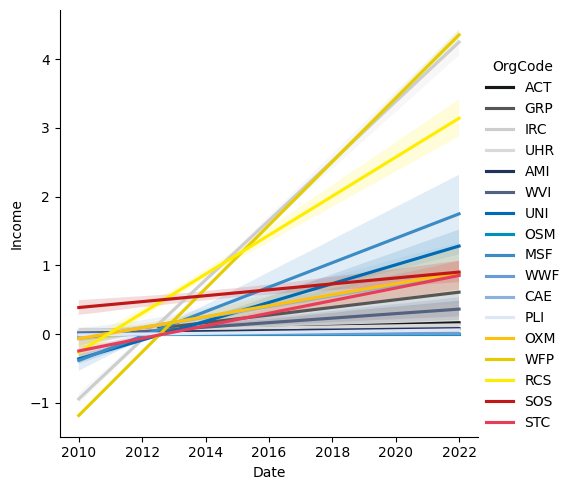

In [88]:
sns.lmplot(x = "Date", y = "Income", data = private_donors_income_no_outliers,hue = 'OrgCode',scatter = False,palette = UNHCR_palette)

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the regression formula with interaction between Date and OrgCode
formula = 'Income ~ Date + C(OrgCode) + Date:C(OrgCode)'

# Fit the linear regression model
model = smf.ols(formula, data=private_donors_income_no_outliers).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     978.9
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:54:46   Log-Likelihood:            -1.1806e+06
No. Observations:              385759   AIC:                         2.361e+06
Df Residuals:                  385725   BIC:                         2.362e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -26

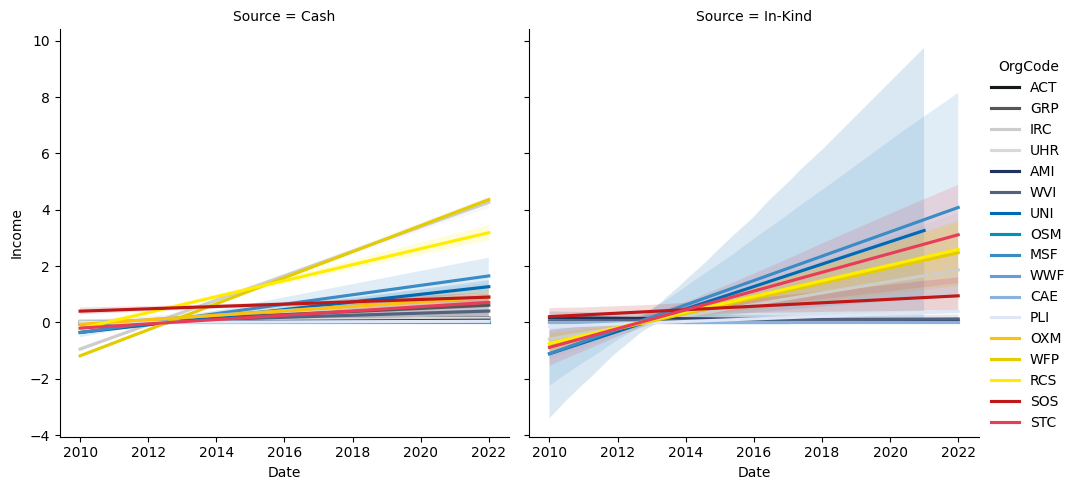

In [89]:
sns.lmplot(x = "Date", y = "Income", data = private_donors_income_no_outliers,col = 'Source',hue = 'OrgCode',scatter = False,col_wrap = 2,palette = UNHCR_palette)

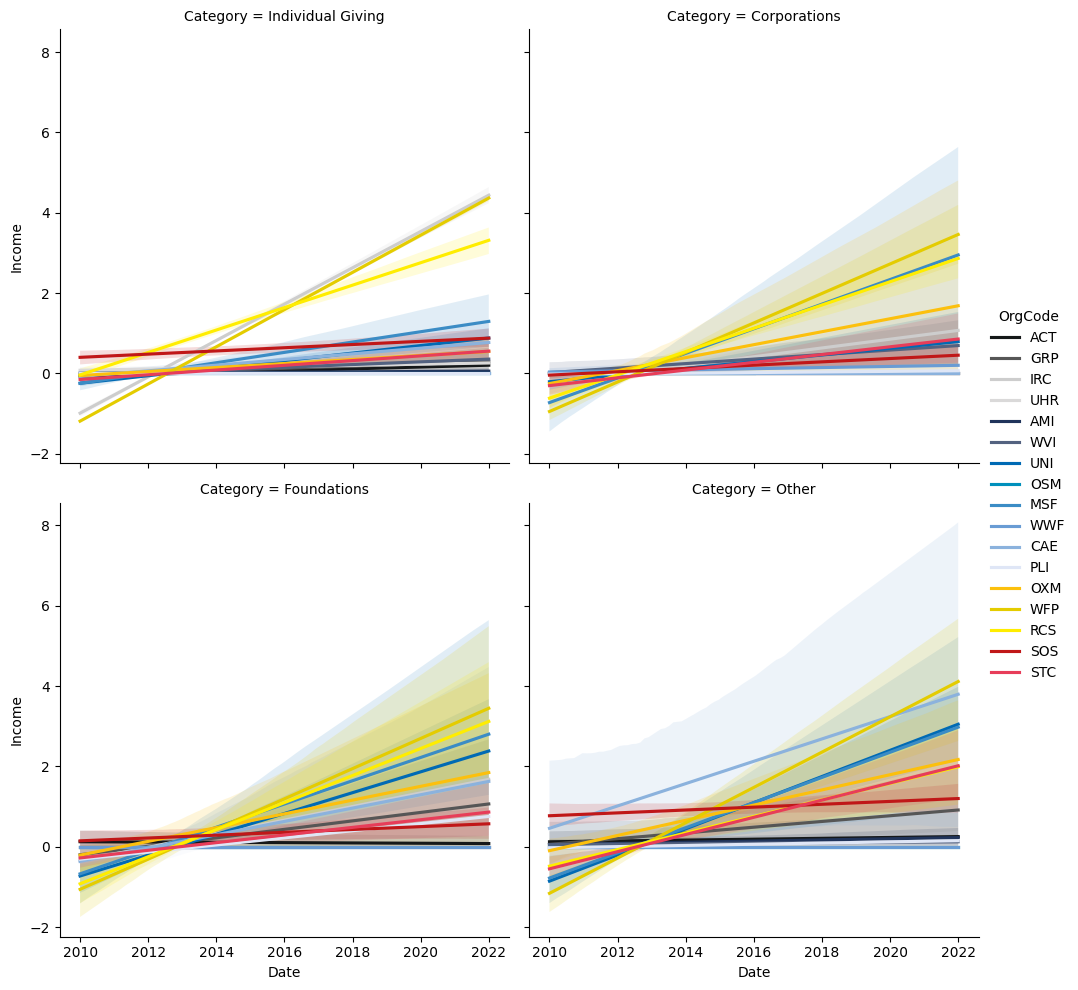

In [90]:
sns.lmplot(x = "Date", y = "Income", data = private_donors_income_no_outliers,col = 'Category',hue = 'OrgCode',scatter = False,col_wrap = 2,palette = UNHCR_palette)

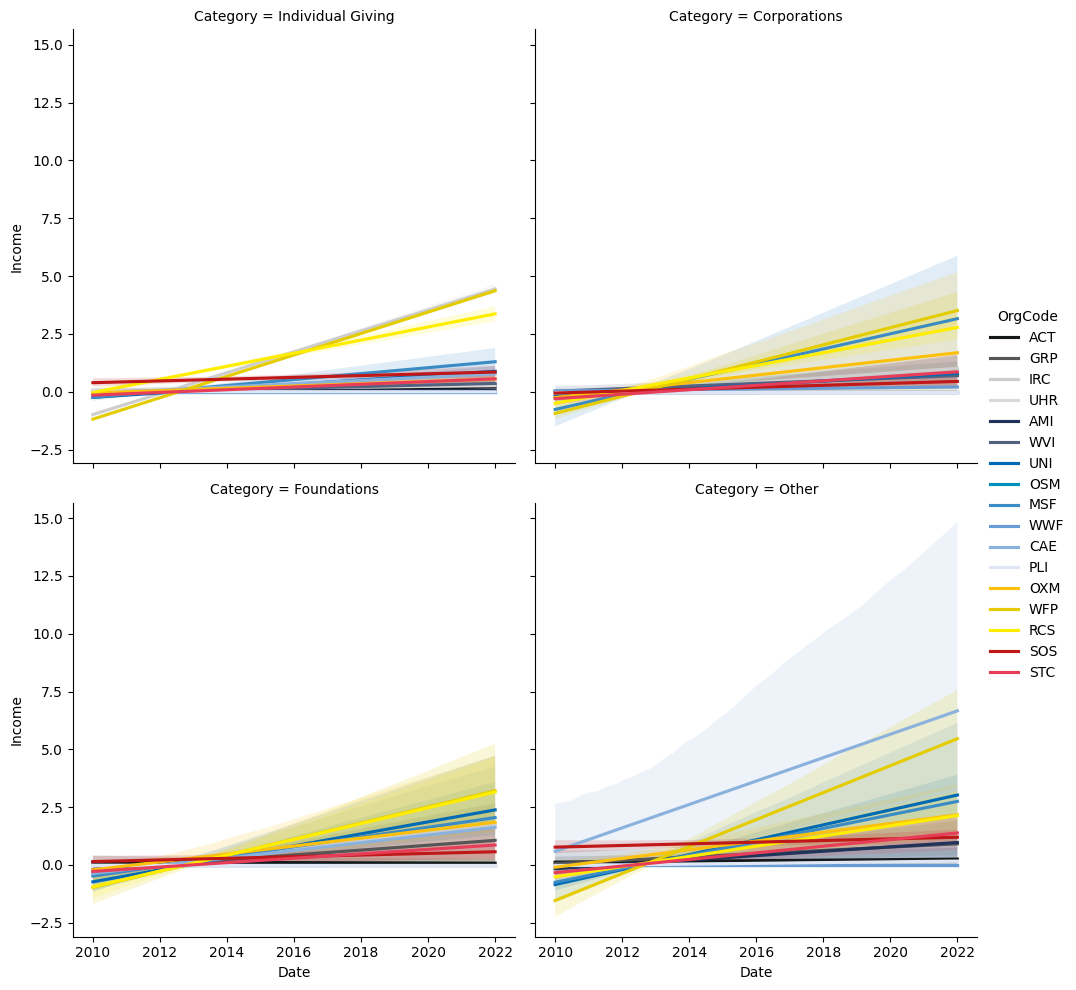

In [91]:
cond = private_donors_income_no_outliers['Source'] == 'Cash' 
sns.lmplot(x = "Date", y = "Income", data = private_donors_income_no_outliers[cond],col = 'Category',hue = 'OrgCode',scatter = False,col_wrap = 2,palette = UNHCR_palette)

### 2.4 The Time Series Analysis of Income Analysis of UNHCR

### Income Without Outliers 

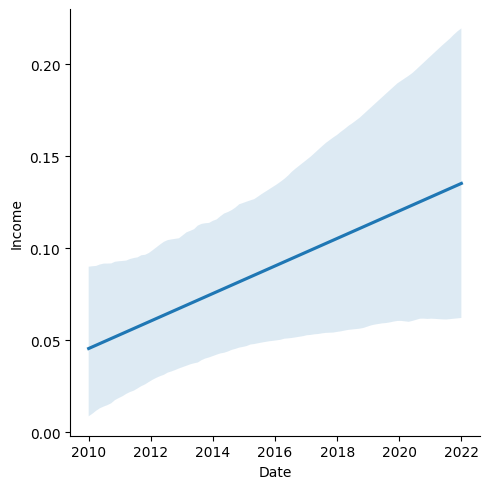

In [44]:
sns.lmplot(x = "Date", y = "Income", data = private_donors_income_UHR,scatter = False)

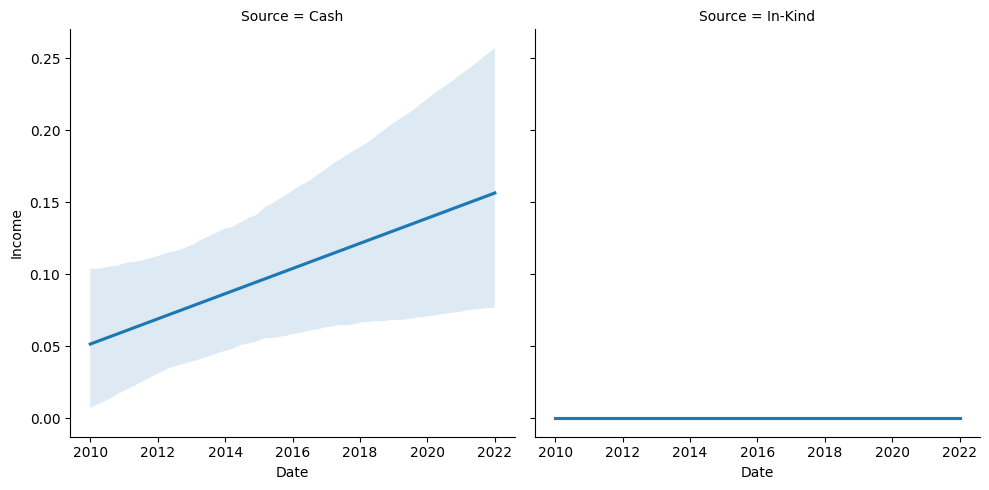

In [45]:
sns.lmplot(x = "Date", y = "Income", data = private_donors_income_UHR,col = 'Source',scatter = False,col_wrap = 2)

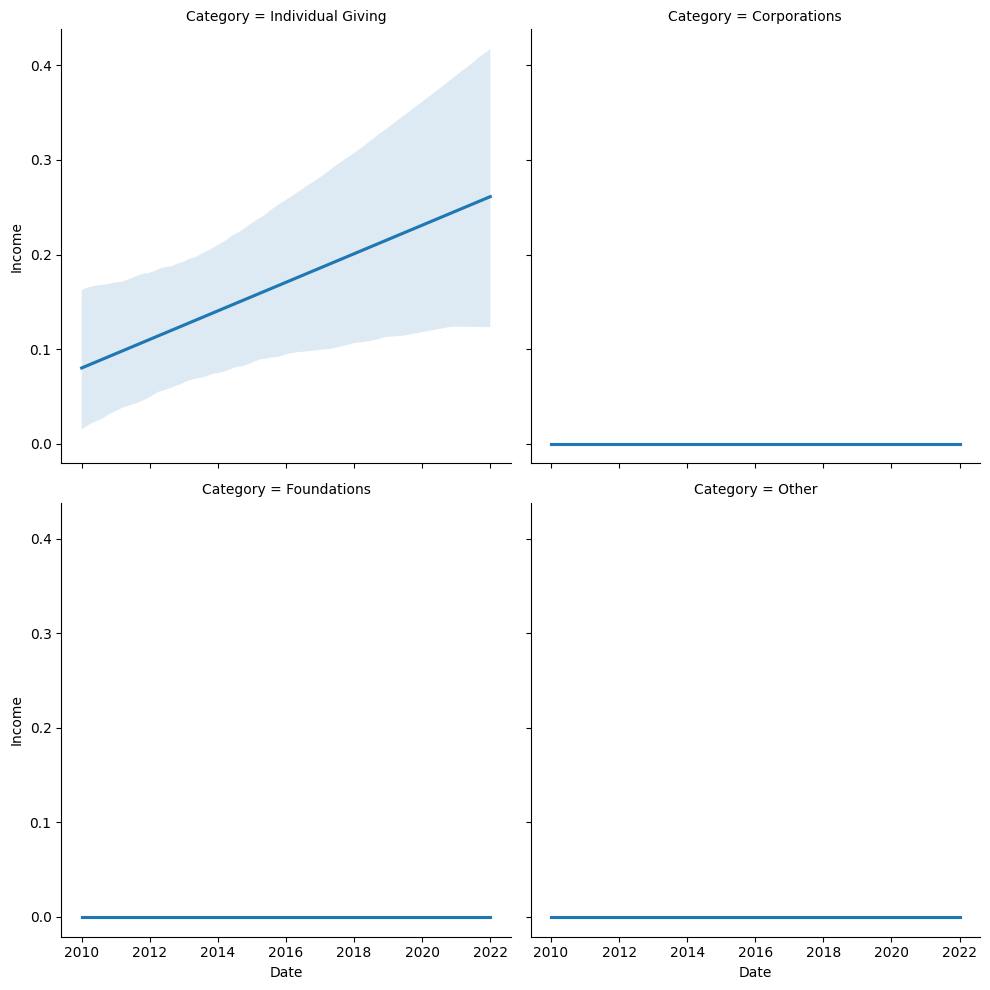

In [46]:
sns.lmplot(x = "Date", y = "Income", data = private_donors_income_UHR,col = 'Category',scatter = False,col_wrap = 2)

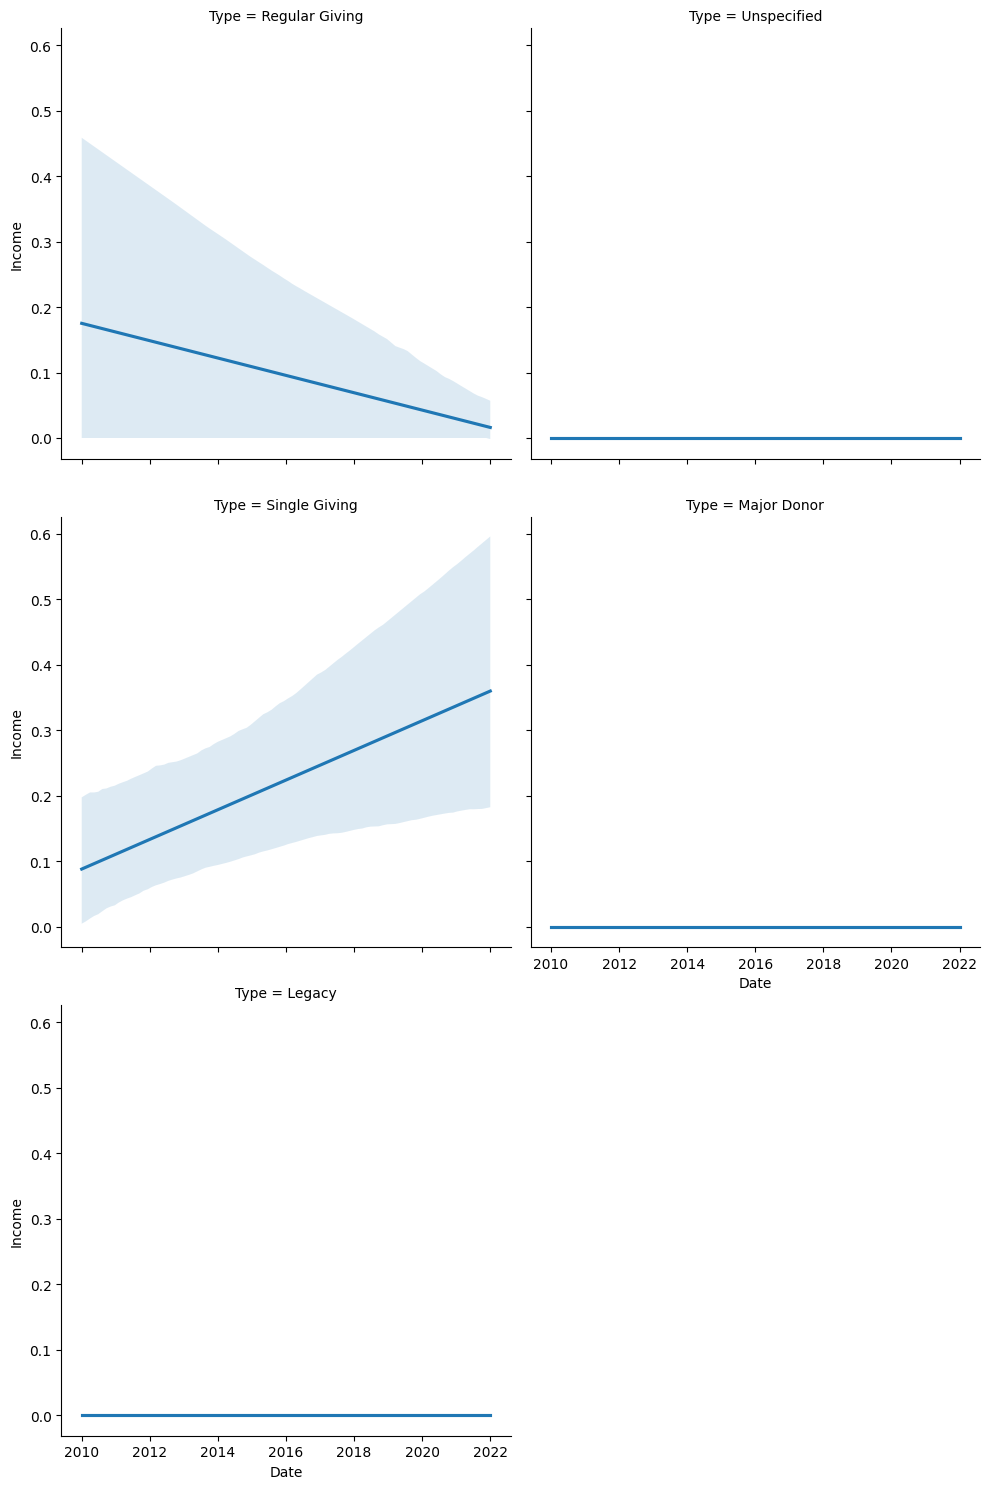

In [47]:
sns.lmplot(x = "Date", y = "Income", data = private_donors_income_UHR,col = 'Type',scatter = False,col_wrap = 2)

### Income With Outliers

In [110]:
condition = private_donors_income_reshape[private_donors_income_reshape['OrgCode'] == 'UHR']

In [109]:
private_donors_income_reshape['Date'] = private_donors_income_reshape['Date'].astype('int')

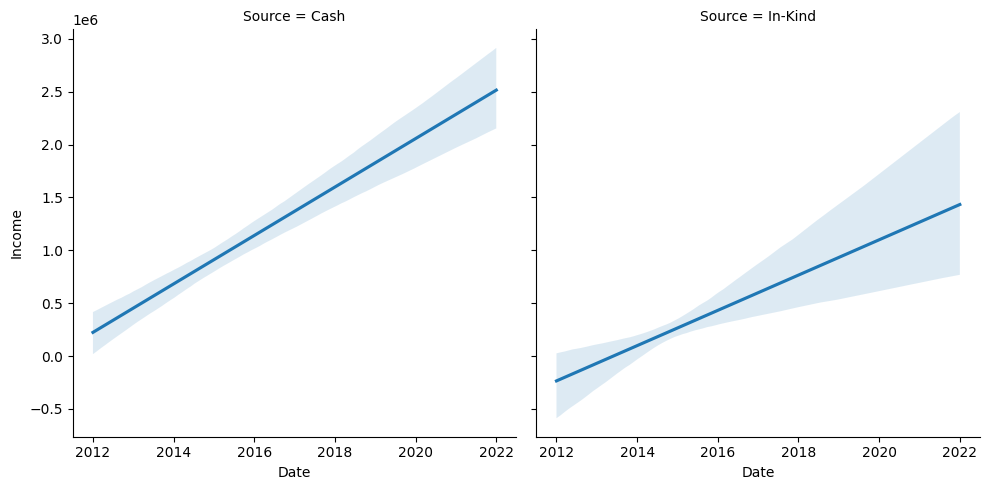

In [111]:
sns.lmplot(x = "Date", y = "Income", data = condition,col = 'Source',scatter = False)

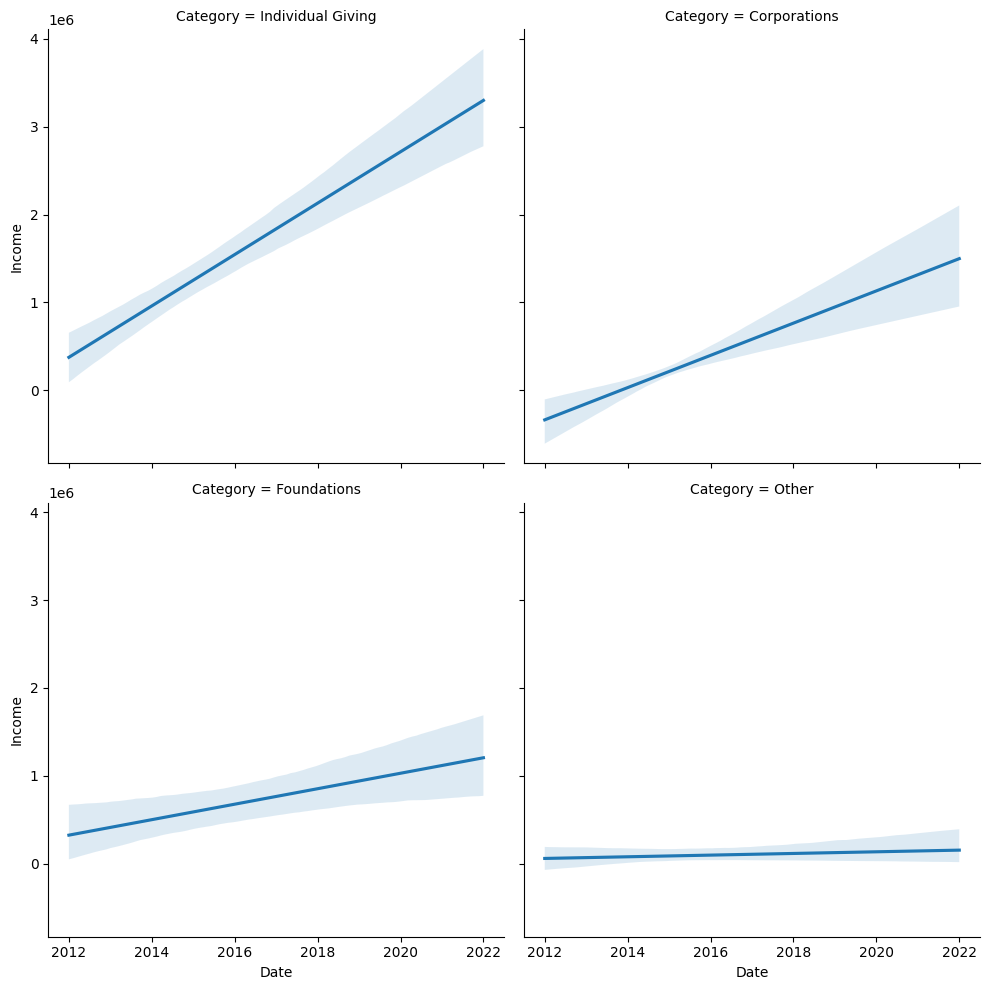

In [114]:
sns.lmplot(x = "Date", y = "Income", data = condition,col = 'Category',scatter = False,col_wrap = 2)

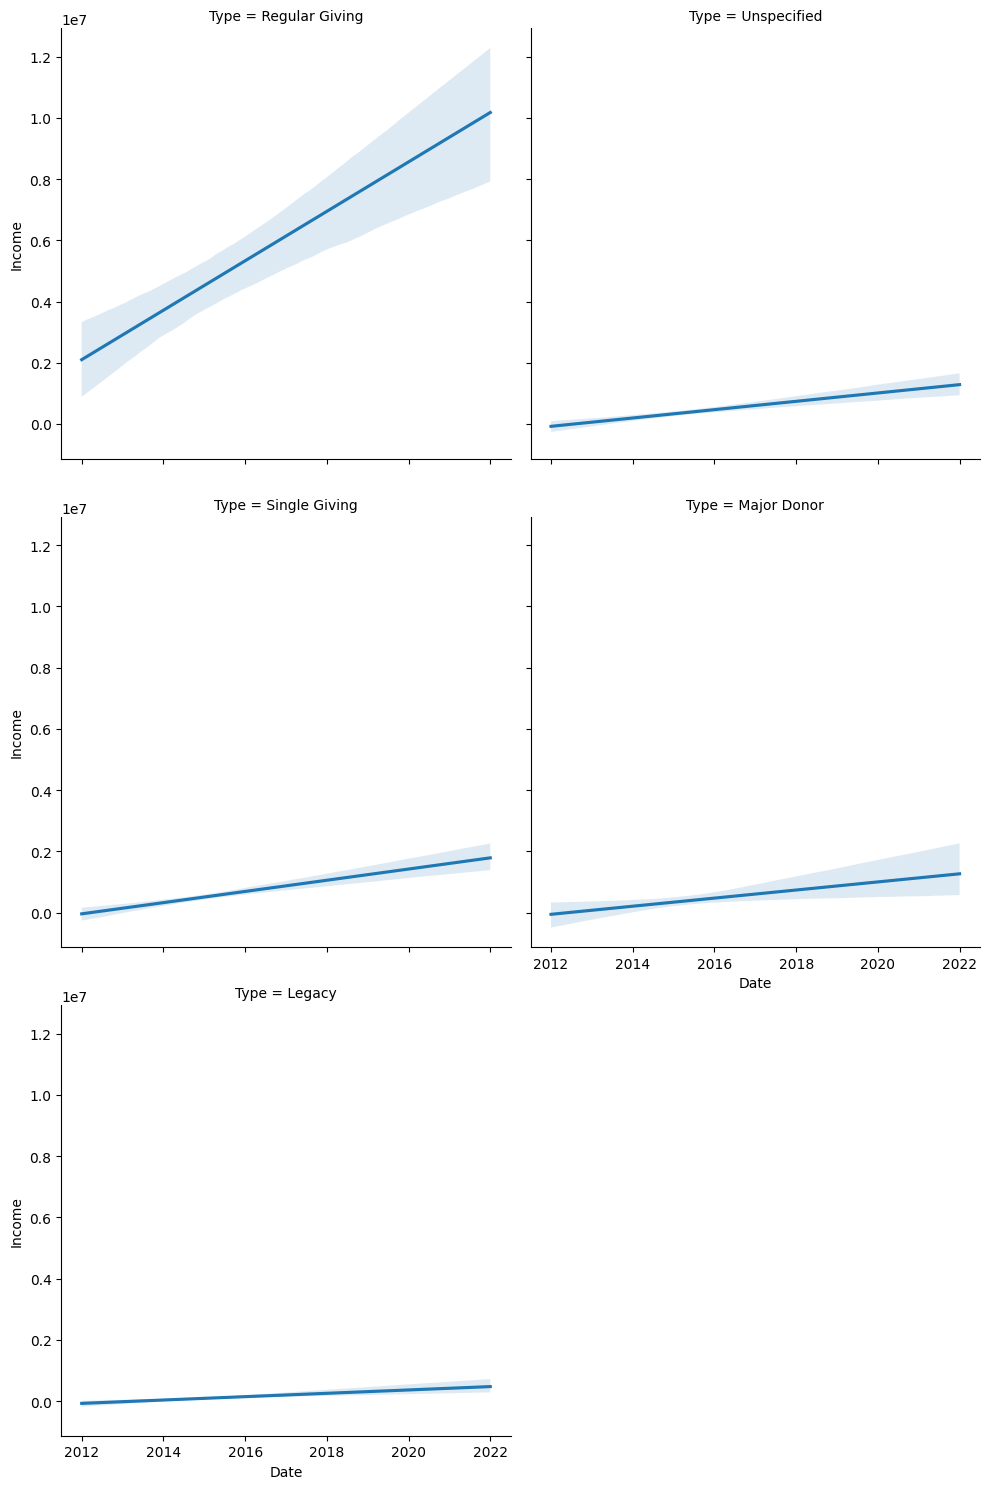

In [115]:
sns.lmplot(x = "Date", y = "Income", data = condition,col = 'Type',scatter = False,col_wrap = 2)

# II . Panel Data Analysis 

In this section we will try to model a linear mixed model for income data

In [31]:
#we will create two hierarchical variables where one we will only only include up to category and one only up to type 

private_donors_income_reshape['Hierarchy_Type'] = private_donors_income_reshape['Source'] + '_' + private_donors_income_reshape['Category'] + '_' + private_donors_income_reshape['Type']

private_donors_income_reshape['Hierarchy_Category'] = private_donors_income_reshape['Source'] + '_' + private_donors_income_reshape['Category'] 


In [53]:
# we will replace all the NA value with 0 
private_donors_income_reshape['Income'] = private_donors_income_reshape['Income'].fillna(0)
private_donors_income_reshape['Donors'] = private_donors_income_reshape['Donors'].fillna(0)

In [127]:
private_donors_income_no_outliers["Hierarchy"] = private_donors_income_no_outliers['Source'] + '_' + private_donors_income_no_outliers['Category']

In [34]:
private_donors_income_no_outliers['Hierarchy_Type'] = private_donors_income_no_outliers['Source'] + '_' + private_donors_income_no_outliers['Category'] + '_' + private_donors_income_no_outliers['Type']

private_donors_income_no_outliers['Hierarchy_Category'] = private_donors_income_no_outliers['Source'] + '_' + private_donors_income_no_outliers['Category'] 

### Model 1

In [120]:
general_formula = 'Income ~  Date + C(OrgCode,Treatment("WFP")) + Date : C(OrgCode,Treatment("WFP"))' 
model = smf.mixedlm(general_formula,
                    private_donors_income_no_outliers,
                    groups= "Hierarchy")
mdf = model.fit()
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Mixed Linear Model Regression Results
===========================================================================================
Model:                        MixedLM           Dependent Variable:           Income       
No. Observations:             385759            Method:                       REML         
No. Groups:                   33                Scale:                        26.6154      
Min. group size:              9                 Log-Likelihood:               -1180386.4074
Max. group size:              214670            Converged:                    Yes          
Mean group size:              11689.7                                                      
-------------------------------------------------------------------------------------------
                                          Coef.   Std.Err.    z     P>|z|  [0.025   0.975] 
-------------------------------------------------------------------------------------------
Intercept                                -926.301    5.896 -157.104 0.000 -937.857 -914.745
C(OrgCode, Treatment("WFP"))[T.ACT]       899.988   68.395   13.159 0.000  765.937 1034.039
C(OrgCode, Treatment("WFP"))[T.AMI]       907.514   35.159   25.812 0.000  838.604  976.423
C(OrgCode, Treatment("WFP"))[T.CAE]       779.575   73.725   10.574 0.000  635.077  924.073
C(OrgCode, Treatment("WFP"))[T.GRP]       818.341   61.651   13.274 0.000  697.508  939.174
C(OrgCode, Treatment("WFP"))[T.IRC]        60.158   15.000    4.011 0.000   30.759   89.558
C(OrgCode, Treatment("WFP"))[T.MSF]       573.588   50.294   11.405 0.000  475.014  672.162
C(OrgCode, Treatment("WFP"))[T.OSM]       933.187  349.825    2.668 0.008  247.543 1618.830
C(OrgCode, Treatment("WFP"))[T.OXM]       766.038   50.302   15.229 0.000  667.448  864.628
C(OrgCode, Treatment("WFP"))[T.PLI]       913.465   35.828   25.496 0.000  843.244  983.687
C(OrgCode, Treatment("WFP"))[T.RCS]       359.059   23.122   15.529 0.000  313.741  404.376
C(OrgCode, Treatment("WFP"))[T.SOS]       847.445   24.808   34.160 0.000  798.822  896.068
C(OrgCode, Treatment("WFP"))[T.STC]       745.547   33.784   22.068 0.000  679.331  811.763
C(OrgCode, Treatment("WFP"))[T.UHR]       916.153   39.012   23.484 0.000  839.691  992.615
C(OrgCode, Treatment("WFP"))[T.UNI]       657.633   29.799   22.069 0.000  599.228  716.037
C(OrgCode, Treatment("WFP"))[T.WVI]       856.447   40.235   21.286 0.000  777.588  935.306
C(OrgCode, Treatment("WFP"))[T.WWF]       933.291   31.429   29.695 0.000  871.691  994.890
Date                                        0.460    0.003  157.283 0.000    0.454    0.466
Date:C(OrgCode, Treatment("WFP"))[T.ACT]   -0.447    0.034  -13.170 0.000   -0.514   -0.381
Date:C(OrgCode, Treatment("WFP"))[T.AMI]   -0.451    0.017  -25.838 0.000   -0.485   -0.417
Date:C(OrgCode, Treatment("WFP"))[T.CAE]   -0.387    0.037  -10.586 0.000   -0.459   -0.316
Date:C(OrgCode, Treatment("WFP"))[T.GRP]   -0.407    0.031  -13.284 0.000   -0.466   -0.347
Date:C(OrgCode, Treatment("WFP"))[T.IRC]   -0.030    0.007   -4.006 0.000   -0.044   -0.015
Date:C(OrgCode, Treatment("WFP"))[T.MSF]   -0.285    0.025  -11.410 0.000   -0.334   -0.236
Date:C(OrgCode, Treatment("WFP"))[T.OSM]   -0.464    0.174   -2.668 0.008   -0.804   -0.123
Date:C(OrgCode, Treatment("WFP"))[T.OXM]   -0.381    0.025  -15.240 0.000   -0.429   -0.332
Date:C(OrgCode, Treatment("WFP"))[T.PLI]   -0.454    0.018  -25.526 0.000   -0.489   -0.419
Date:C(OrgCode, Treatment("WFP"))[T.RCS]   -0.178    0.011  -15.523 0.000   -0.201   -0.156
Date:C(OrgCode, Treatment("WFP"))[T.SOS]   -0.421    0.012  -34.182 0.000   -0.445   -0.397
Date:C(OrgCode, Treatment("WFP"))[T.STC]   -0.370    0.017  -22.093 0.000   -0.403   -0.338
Date:C(OrgCode, Treatment("WFP"))[T.UHR]   -0.455    0.019  -23.509 0.000   -0.493   -0.417
Date:C(OrgCode, Treatment("WFP"))[T.UNI]   -0.327    0.015  -22.086 0.000   -0.356   -0.298
Date:C(OrgCode, Treatm

In [143]:
# Get the summary as a string
summary_str = str(mdf.summary())

# Save the summary to a text file
with open('model_summary.txt', 'w') as f:
    f.write(summary_str)

In [122]:
# Save the summary to a text file
with open('model_summary.txt', 'w') as f:
    f.write(summary_str)

### Model 2

In [131]:
general_formula = 'Income ~  Date + C(Hierarchy,Treatment("Cash_Individual Giving")) + Date : C(Hierarchy,Treatment("Cash_Individual Giving"))' 
model_2 = smf.mixedlm(general_formula,
                    private_donors_income_no_outliers,
                    groups= "Hierarchy")
mdf_2 = model_2.fit()
mdf_2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                  Mixed Linear Model Regression Results
==========================================================================================================================================
Model:                                       MixedLM                           Dependent Variable:                           Income       
No. Observations:                            385759                            Method:                                       REML         
No. Groups:                                  8                                 Scale:                                        27.0333      
Min. group size:                             401                               Log-Likelihood:                               -1183335.6991
Max. group size:                             341894                            Converged:                                    Yes          
Mean group size:                             48219.9                                                                                      
------------------------------------------------------------------------------------------------------------------------------------------
                                                                                     Coef.     Std.Err.      z    P>|z|   [0.025   0.975] 
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                           -800.930     4097.022  -0.195 0.845 -8830.946 7229.086
C(Hierarchy, Treatment("Cash_Individual Giving"))[T.Cash_Corporations]               507.808     4108.978   0.124 0.902 -7545.641 8561.257
C(Hierarchy, Treatment("Cash_Individual Giving"))[T.Cash_Foundations]                550.030     4096.454   0.134 0.893 -7478.873 8578.933
C(Hierarchy, Treatment("Cash_Individual Giving"))[T.Cash_Other]                      584.343     4098.062   0.143 0.887 -7447.711 8616.398
C(Hierarchy, Treatment("Cash_Individual Giving"))[T.In-Kind_Corporations]            430.248     4097.860   0.105 0.916 -7601.411 8461.906
C(Hierarchy, Treatment("Cash_Individual Giving"))[T.In-Kind_Foundations]             414.793     4099.407   0.101 0.919 -7619.897 8449.483
C(Hierarchy, Treatment("Cash_Individual Giving"))[T.In-Kind_Individual Giving]       580.926     4098.433   0.142 0.887 -7451.854 8613.707
C(Hierarchy, Treatment("Cash_Individual Giving"))[T.In-Kind_Other]                   659.651     4097.502   0.161 0.872 -7371.305 8690.607
Date                                                                                   0.398        0.002 159.590 0.000     0.393    0.403
Date:C(Hierarchy, Treatment("Cash_Individual Giving"))[T.Cash_Corporations]           -0.252        0.012 -21.060 0.000    -0.276   -0.229
Date:C(Hierarchy, Treatment("Cash_Individual Giving"))[T.Cash_Foundations]            -0.273        0.017 -16.507 0.000    -0.306   -0.241
Date:C(Hierarchy, Treatment("Cash_Individual Giving"))[T.Cash_Other]                  -0.290        0.012 -23.309 0.000    -0.315   -0.266
Date:C(Hierarchy, Treatment("Cash_Individual Giving"))[T.In-Kind_Corporations]        -0.214        0.029  -7.491 0.000    -0.270   -0.158
Date:C(Hierarchy, Treatment("Cash_Individual Giving"))[T.In-Kind_Foundations]         -0.206        0.069  -2.977 0.003    -0.342   -0.070
Date:C(Hierarchy, Treatment("Cash_Individual Giving"))[T.In-Kind_Individual Giving]   -0.288        0.053  -5.450 0.000    -0.392   -0.185
Date:C(Hierarchy, Treatment("Cash_Individual Giving"))[T.In-Kind_Other]               -0.328        0.027 -12.225 0.000    -0.380   -0.275
Hierarchy Var                                                                         27.033 42787221.107                                 
==============================================================================================================

### Model 2 - Version 2

In [36]:
general_formula = 'Income ~  Date + C(Hierarchy_Type,Treatment("Cash_Individual Giving_Single Giving")) + Date : C(Hierarchy_Type,Treatment("Cash_Individual Giving_Single Giving"))' 
model_2_1 = smf.mixedlm(general_formula,
                    private_donors_income_no_outliers,
                    groups= "Hierarchy_Category")
mdf_2_1 = model_2_1.fit()
mdf_2_1.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                                     Mixed Linear Model Regression Results
================================================================================================================================================================================
Model:                                                   MixedLM                                        Dependent Variable:                                        Income       
No. Observations:                                        385759                                         Method:                                                    REML         
No. Groups:                                              8                                              Scale:                                                     26.8129      
Min. group size:                                         401                                            Log-Likelihood:                                            -1181779.9471
Max. group size:                                         341894                                         Converged:                                                 Yes          
Mean group size:                                         48219.9                                                                                                                
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                           Coef.     Std.Err.     z    P>|z|   [0.025    0.975] 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                 -932.996     587.966  -1.587 0.113 -2085.388   219.395
C(Hierarchy_Type, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Corporations_CRM]                              722.305     600.887   1.202 0.229  -455.412  1900.022
C(Hierarchy_Type, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Corporations_Corporate Foundation]             602.845     593.214   1.016 0.310  -559.834  1765.523
C(Hierarchy_Type, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Corporations_Grants]                           571.132     601.387   0.950 0.342  -607.564  1749.828
C(Hierarchy_Type, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Corporations_Lottery]                          932.996     658.151   1.418 0.156  -356.957  2222.949
C(Hierarchy_Type, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Corporations_Memberships]                      -68.892     787.445  -0.087 0.930 -1612.256  1474.472
C(Hierarchy_Type, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Corporations_Unspecified]                      644.546     590.249   1.092 0.275  -512.321  1801.413
C(Hierarchy_Type, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Foundations_Unspecified]                       682.096     588.815   1.158 0.247  -471.959  1836.152
C(Hierarchy_Type, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Individual Giving_Legacy]                      851.748      43.175  19.728 0.000   767.127   936.370
C(Hierarchy_Type, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Individual Giving_Major Donor]                 748.643      29.728  25.183 0.000   690.376   806.910
C(Hierarchy_Type, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Individual Giving_Regular Giving]              291.699      11.062  26.370 0.000   270.018   313.380
C(Hierarchy_Type, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Individual Giving_Unspecified]                 760.

In [37]:
# Get the summary as a string
summary_str_model2_ver = str(mdf_2_1.summary())

# Save the summary to a text file
with open('model_summary_model2_ver.txt', 'w') as f:
    f.write(summary_str_model2_ver)

In [142]:
# Get the summary as a string
summary_str_2 = str(mdf_2.summary())

# Save the summary to a text file
with open('model_summary_2.txt', 'w') as f:
    f.write(summary_str_2)

### Growth Model For Income - UNHCR

In [30]:
private_donors_income_UHR = private_donors_income_no_outliers[private_donors_income_no_outliers['OrgCode'] == 'UHR'] 
private_donors_income_UHR.shape

(5111, 25)

In [32]:
private_donors_income_UHR.describe()['Income'] 


count    5111.000000
mean        0.084694
std         1.490440
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        39.000000
Name: Income, dtype: float64

In [134]:
# we will convert the donor column to a float and date to an integer
private_donors_income_UHR['Donors'] = private_donors_income_UHR['Donors'].astype('float64')
private_donors_income_UHR['Date'] = private_donors_income_UHR['Date'].astype('int64')

In [135]:
private_donors_income_UHR.columns

Index(['OrgCode', 'CountryStandardised', 'CountrySubmitted', 'RegionSubmitted',
       'LineDescription', 'IncomeAllocation', 'RestrictedIncome',
       'EmergencyIncome', 'Source', 'Category', 'Type', 'Item', 'CurrencyCode',
       'Notes', 'ProvisionalFigureCY', 'UNHCR market type', 'UNHCR market',
       'Panel Org', 'UNHCR region', 'Country', 'Region', 'Group', 'Status',
       'Donor Type', 'Date', 'Income', 'Donors', 'Hierarchy', 'Log Income',
       'LogIncome'],
      dtype='object')

In [137]:
private_donors_income_UHR["Hierarchy"] = private_donors_income_UHR['Source'] + '_' + private_donors_income_UHR['Category'] + '_' + private_donors_income_UHR['Type'] 

In [38]:
general_formula = 'Income ~  Date + C(Hierarchy,Treatment("Cash_Individual Giving"))' 
model = smf.mixedlm(general_formula,
                    private_donors_income_UHR,
                    groups= "Hierarchy",
                   re_formula = "Date")
mdf = model.fit()
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                         Mixed Linear Model Regression Results
========================================================================================================================
Model:                                  MixedLM                      Dependent Variable:                      Income    
No. Observations:                       5111                         Method:                                  REML      
No. Groups:                             7                            Scale:                                   2.2165    
Min. group size:                        12                           Log-Likelihood:                          -9312.5327
Max. group size:                        2748                         Converged:                               Yes       
Mean group size:                        730.1                                                                           
------------------------------------------------------------------------------------------------------------------------
                                                                           Coef.  Std.Err.   z    P>|z|  [0.025   0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 -30.247   14.660 -2.063 0.039  -58.981  -1.514
C(Hierarchy, Treatment("Cash_Individual Giving"))[T.Cash_Corporations]     30.238   30.636  0.987 0.324  -29.807  90.284
C(Hierarchy, Treatment("Cash_Individual Giving"))[T.Cash_Foundations]      30.236   34.090  0.887 0.375  -36.579  97.051
C(Hierarchy, Treatment("Cash_Individual Giving"))[T.Cash_Other]            30.209   57.821  0.522 0.601  -83.118 143.537
C(Hierarchy, Treatment("Cash_Individual Giving"))[T.In-Kind_Corporations]  30.230   40.493  0.747 0.455  -49.135 109.595
C(Hierarchy, Treatment("Cash_Individual Giving"))[T.In-Kind_Foundations]   30.201   63.277  0.477 0.633  -93.819 154.221
C(Hierarchy, Treatment("Cash_Individual Giving"))[T.In-Kind_Other]         29.689  216.285  0.137 0.891 -394.221 453.599
Date                                                                        0.002    0.114  0.019 0.985   -0.222   0.226
Hierarchy Var                                                               2.217 1370.859                              
Hierarchy x Date Cov                                                       -0.000                                       
Date Var                                                                    0.089                                       
========================================================================================================================

"""

In [40]:
private_donors_income_UHR["Hierarchy"] = private_donors_income_UHR['Source'] + '_' + private_donors_income_UHR['Category'] + '_' + private_donors_income_UHR['Type']

In [42]:
private_donors_income_UHR.value_counts('Hierarchy')

Hierarchy
Cash_Individual Giving_Single Giving     1803
Cash_Corporations_Unspecified             892
Cash_Foundations_Unspecified              635
In-Kind_Corporations_Unspecified          487
Cash_Individual Giving_Regular Giving     459
Cash_Individual Giving_Major Donor        392
Cash_Other_Unspecified                    186
In-Kind_Foundations_Unspecified           151
Cash_Individual Giving_Legacy              94
In-Kind_Other_Unspecified                  12
Name: count, dtype: int64

In [139]:
general_formula = 'Income ~  Date + C(Hierarchy,Treatment("Cash_Individual Giving_Single Giving")) + Date : C(Hierarchy,Treatment("Cash_Individual Giving_Single Giving"))' 
model_3 = smf.mixedlm(general_formula,
                    private_donors_income_UHR,
                    groups= "Hierarchy")
mdf_3 = model_3.fit()
mdf_3.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                            Mixed Linear Model Regression Results
==============================================================================================================================================================
Model:                                              MixedLM                                   Dependent Variable:                                   Income    
No. Observations:                                   5111                                      Method:                                               REML      
No. Groups:                                         10                                        Scale:                                                2.2171    
Min. group size:                                    12                                        Log-Likelihood:                                       -9320.0030
Max. group size:                                    1803                                      Converged:                                            Yes       
Mean group size:                                    511.1                                                                                                     
--------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                               Coef.   Std.Err.    z    P>|z|  [0.025   0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                     -45.481     18.457 -2.464 0.014  -81.655  -9.306
C(Hierarchy, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Corporations_Unspecified]               45.481     32.749  1.389 0.165  -18.706 109.667
C(Hierarchy, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Foundations_Unspecified]                45.481     36.015  1.263 0.207  -25.107 116.068
C(Hierarchy, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Individual Giving_Legacy]               45.481     94.868  0.479 0.632 -140.457 231.418
C(Hierarchy, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Individual Giving_Major Donor]          45.481     44.780  1.016 0.310  -42.286 133.247
C(Hierarchy, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Individual Giving_Regular Giving]       72.306     44.347  1.630 0.103  -14.614 159.225
C(Hierarchy, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Other_Unspecified]                      45.481     59.163  0.769 0.442  -70.477 161.438
C(Hierarchy, Treatment("Cash_Individual Giving_Single Giving"))[T.In-Kind_Corporations_Unspecified]            45.481     42.161  1.079 0.281  -37.153 128.114
C(Hierarchy, Treatment("Cash_Individual Giving_Single Giving"))[T.In-Kind_Foundations_Unspecified]             45.481     64.592  0.704 0.481  -81.117 172.078
C(Hierarchy, Treatment("Cash_Individual Giving_Single Giving"))[T.In-Kind_Other_Unspecified]                   45.481    229.498  0.198 0.843 -404.328 495.289
Date                                                                                                            0.023      0.009  2.484 0.013    0.005   0.041
Date:C(Hierarchy, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Corporations_Unspecified]          -0.023      0.016 -1.398 0.162   -0.054   0.009
Date:C(Hierarchy, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Foundations_Unspecified]           -0.023      0.018 -1.271 0.204   -0.058   0.012
Date:C(Hierarchy, Treatment("Cash_Individual Giving_Single Giving"))[T.Cash_Individual Giving_Legacy]          -0.023      0.047 -0.481 0.630   -0.115   0.070
Date:C(Hierarchy, Treatment("Cash_Ind

In [141]:
# Get the summary as a string
summary_str_3 = str(mdf_3.summary())

# Save the summary to a text file
with open('model_summary_3.txt', 'w') as f:
    f.write(summary_str_3)
# Save the summary to a text file
with open('model_summary.txt', 'w') as f:
    f.write(summary_str_3)

In [73]:
private_donors_income_UHR.shape

(7384, 28)

In [28]:
# Fit a growth model
formula = 'Income ~ Date'  # Model formula
#we want to create a new column that contains the income hierarchy 
private_donors_income_UHR['Hierarchy'] = private_donors_income_UHR['Source'] + '_' + private_donors_income_UHR['Category'] + '_' + private_donors_income_UHR['Type']
model = sm.MixedLM.from_formula(formula, private_donors_income_UHR, groups=private_donors_income_UHR['Hierarchy'], re_formula='Date', missing='drop')
result = model.fit()

# Print model summary
print(result.summary())

                           Mixed Linear Model Regression Results
Model:                     MixedLM          Dependent Variable:          Income             
No. Observations:          6116             Method:                      REML               
No. Groups:                10               Scale:                       29865828352347.0547
Min. group size:           11               Log-Likelihood:              -103625.2907       
Max. group size:           2046             Converged:                   No                 
Mean group size:           611.6                                                            
--------------------------------------------------------------------------------------------
                       Coef.           Std.Err.     z    P>|z|     [0.025         0.975]    
--------------------------------------------------------------------------------------------
Intercept            -446389905.831  44862729.131 -9.950 0.000 -534319239.176 -358460572.486
Date 

In [67]:
#saving the reshaped version of income 

%store private_income_reshape

#saving the reshaped version of donors
%store private_donors_reshape 

#saving the melted dataframe 
%store private_donors_income_reshape


Stored 'private_income_reshape' (DataFrame)
Stored 'private_donors_reshape' (DataFrame)
Stored 'private_donors_income_reshape' (DataFrame)


In [ ]:
#function to save a dataset in a pickle format 


def save_dataset_to_pickle(dataset, filename):
    """
    Save a dataset to a pickle file.

    Parameters:
    - dataset: The dataset to be saved.
    - filename: The name of the pickle file (including the .pkl extension).
    """
    with open(filename, 'wb') as file:
        pickle.dump(private_public_income, file)
    print(f'Dataset saved to {filename}')

In [ ]:
#save the dataset in the pickle file 
save_dataset_to_pickle(private_public_income,"private_public_income.pkl")